3/3 [==============================] - 0s 3ms/step


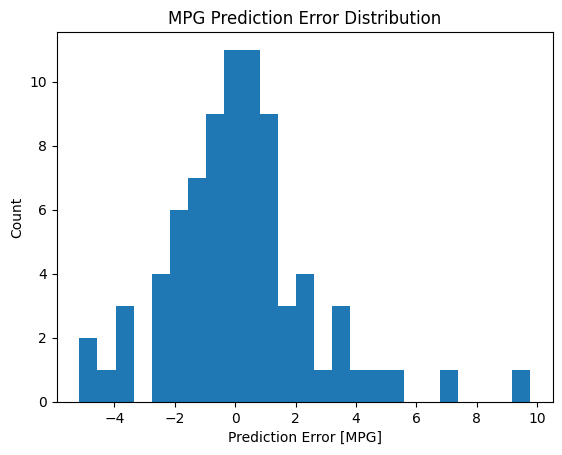

In [4]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load the Auto MPG dataset from TensorFlow datasets
dataset_path = tf.keras.utils.get_file(
    "auto-mpg.data",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
)

# Column names (from UCI Auto MPG dataset description)
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration','Model Year','Origin']

raw_dataset = pd.read_csv(dataset_path, names=column_names,
                          na_values="?", comment='\t',
                          sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()

# 2. Clean data
dataset = dataset.dropna()

# One-hot encode 'Origin' column
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0

# 3. Split train/test
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

# Normalize features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_dataset)
test_features = scaler.transform(test_dataset)

# 4. Build simple regression model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss='mse', metrics=['mae', 'mse'])
    return model

model = build_model()

# 5. Train model
history = model.fit(train_features, train_labels,
                    validation_split=0.2,
                    epochs=100, verbose=0)

# 6. Predictions
test_predictions = model.predict(test_features).flatten()

# 7. Prediction error plot (this is what you should publish)
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")
plt.title("MPG Prediction Error Distribution")
plt.show()
